# World Happiness Report 2021 EDA & Data Visualizations

Check out the dataset [here](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021).

The [World Happiness Report ](https://worldhappiness.report/ed/2021/) is an annual report published by the United Nations Sustainable Development Solutions Network using data from the Gallup World Poll. The following represent the features in the dataset:

* **Ladder Score**: Happiness score or subjective well-being. The national average response to the question of life evaluations: “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?” 
* **Logged GDP per Capita**: GDP per capita from the October 14, 2020 update of the World Development Indicators (WDI)
* **Social Support**: The national average of the binary responses (either 0 or 1) to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
* **Healthy Life Expectancy**: Healthy life expectancies at birth based on data extracted from the World Health Organization’s (WHO) Global Health Observatory data repository (Last updated: 2020-09-28)
* **Freedom to Make Life Choices**:  National average of responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”
* **Generosity**: Residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita
* **Perceptions of Corruption**: national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?” The overall perception is just the average of the two 0-or-1 responses

Other features present are statistics on the above features that give some insight into the distribution.

[Data Dictionary](https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf)



# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pycountry
import geopandas as gpd

# Load & View Data

In [2]:
whr = pd.read_csv('data/world-happiness-report-2021.csv')
whr.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
whr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ladder score,149.0,5.532839,1.073924e+00,2.523,4.852,5.534,6.255,7.842
Standard error of ladder score,149.0,0.058752,2.200120e-02,0.026,0.043,0.054,0.070,0.173
upperwhisker,149.0,5.648007,1.054330e+00,2.596,4.991,5.625,6.344,7.904
lowerwhisker,149.0,5.417631,1.094879e+00,2.449,4.706,5.413,6.128,7.780
Logged GDP per capita,149.0,9.432208,1.158601e+00,6.635,8.541,9.569,10.421,11.647
Social support,149.0,0.814745,1.148890e-01,0.463,0.750,0.832,0.905,0.983
Healthy life expectancy,149.0,64.992799,6.762043e+00,48.478,59.802,66.603,69.600,76.953
Freedom to make life choices,149.0,0.791597,1.133318e-01,0.382,0.718,0.804,0.877,0.970
Generosity,149.0,-0.015134,1.506567e-01,-0.288,-0.126,-0.036,0.079,0.542
Perceptions of corruption,149.0,0.727450,1.792263e-01,0.082,0.667,0.781,0.845,0.939


# Distribution of Countries in Each Region

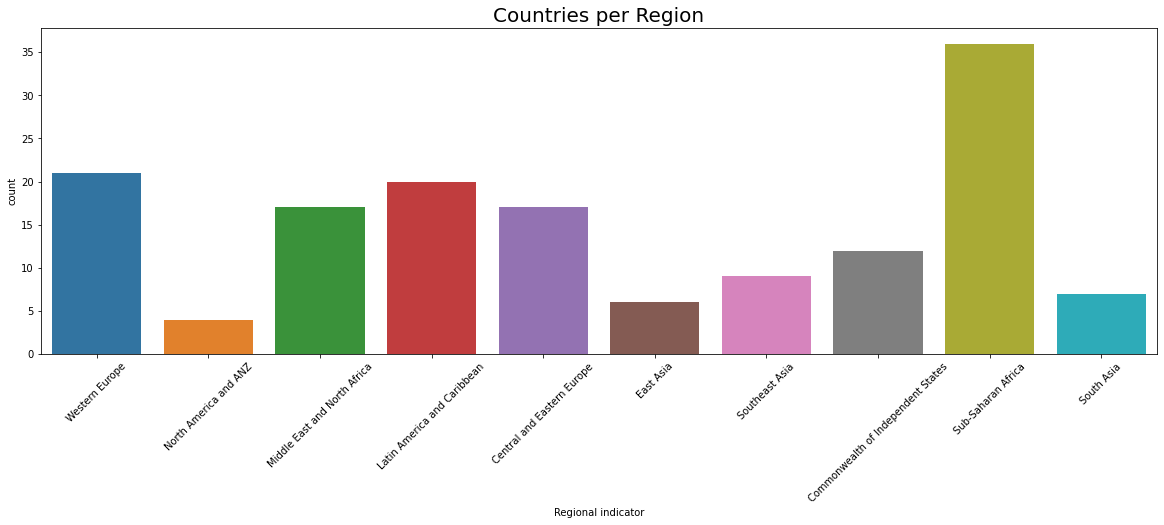

In [52]:
plt.figure(figsize=(20,6))
sns.countplot(x="Regional indicator", data=whr)
plt.xticks(rotation=45)
plt.title("Countries per Region", fontdict={'fontsize':20})
plt.show()

# Happiness Score in Each Region

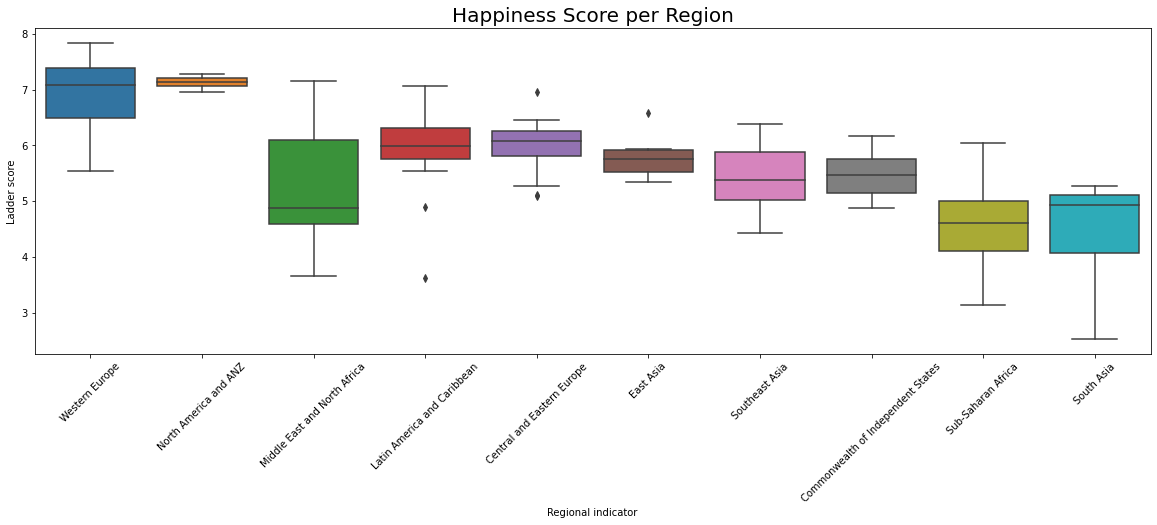

In [59]:
plt.figure(figsize=(20, 6))
sns.boxplot(x="Regional indicator", y="Ladder score", data=whr)
plt.title('Happiness Score per Region', fontdict={'fontsize':20})
plt.xticks(rotation=45)
plt.show()

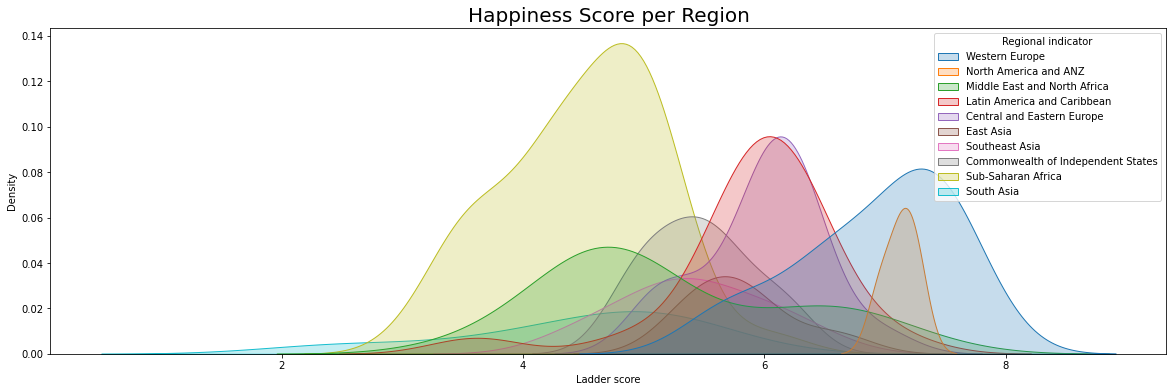

In [60]:
plt.figure(figsize=(20, 6))
sns.kdeplot(hue="Regional indicator", x="Ladder score", data=whr, shade=True, )
plt.title('Happiness Score per Region', fontdict={'fontsize':20})
plt.show()

We see that countries in Western Europe and North America/ANZ tend to have higher ladder scores, while countries in Sub-Saharan Africa and South Asia have lower ladder scores. Countries in the Middle East and North Africa have the largest range for ladder scores.

# Variable Correlations

In [71]:
important_columns = ['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
whr_corr = whr.reindex(columns=important_columns)

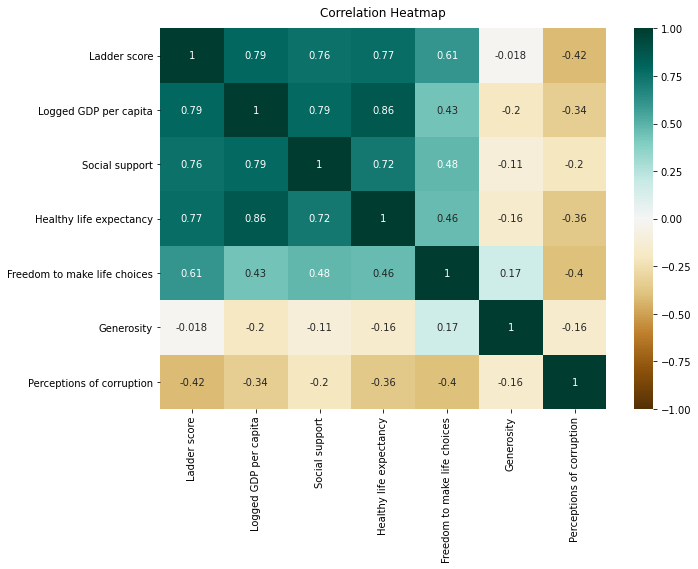

In [72]:
plt.figure(figsize=(10, 7))
corr_heatmap = sns.heatmap(whr_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
corr_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Correlation with Ladder Score

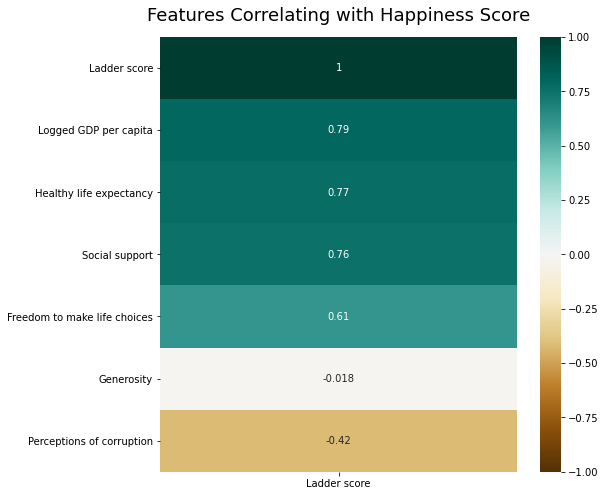

In [38]:
plt.figure(figsize=(8, 8))
happy_heatmap = sns.heatmap(whr_corr.corr()[['Ladder score']].sort_values(by='Ladder score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
happy_heatmap.set_title('Features Correlating with Happiness Score', fontdict={'fontsize':18}, pad=16);

Variables with really strong correlations are:
* Logged GDP per capita and Healthy life expectancy
* Ladder score and Logged GDP per capita
* Ladder score and healthy life expectancy
* Ladder score and social support

Surprisingly, Perceptions of Corruption has little correlation with any other variables and Freedom to make life choices is not as strongly linked to Ladder score as one might initially think.

# 10 Most Happy vs 10 Least Happy Countries

In [30]:
top10 = whr.head(10)
top10

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.6,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


In [31]:
bot10 = whr.tail(10)
bot10

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
139,Burundi,Sub-Saharan Africa,3.775,0.107,3.985,3.565,6.635,0.490,53.400,0.626,-0.024,0.607,2.43,0.000,0.062,0.155,0.298,0.172,0.212,2.876
140,Yemen,Middle East and North Africa,3.658,0.070,3.794,3.521,7.578,0.832,57.122,0.602,-0.147,0.800,2.43,0.329,0.831,0.272,0.268,0.092,0.089,1.776
141,Tanzania,Sub-Saharan Africa,3.623,0.071,3.762,3.485,7.876,0.702,57.999,0.833,0.183,0.577,2.43,0.433,0.540,0.300,0.549,0.307,0.231,1.263
142,Haiti,Latin America and Caribbean,3.615,0.173,3.953,3.276,7.477,0.540,55.700,0.593,0.422,0.721,2.43,0.294,0.173,0.227,0.257,0.463,0.139,2.060
143,Malawi,Sub-Saharan Africa,3.600,0.092,3.781,3.419,6.958,0.537,57.948,0.780,0.038,0.729,2.43,0.113,0.168,0.298,0.484,0.213,0.134,2.190
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


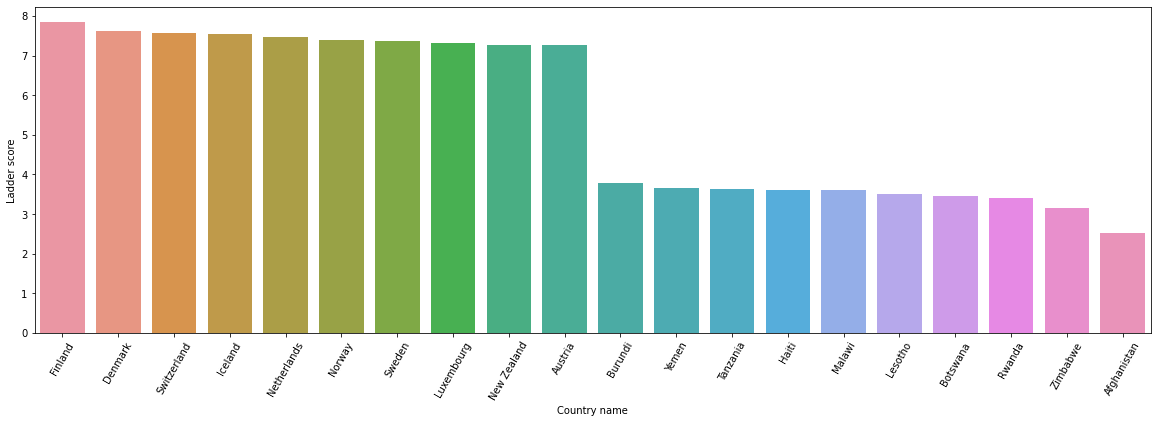

In [61]:
data = pd.concat([top10,bot10])
plt.figure(figsize=(20,6))
sns.barplot(x="Country name", y="Ladder score", data=data)
plt.xticks(rotation=60)
plt.show()

## Top 10 Happiest Countries

In [75]:
top10.reindex(columns=important_columns).describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,7.467500,10.975100,0.945300,72.980000,0.933100,0.061300,0.328400
std,0.181051,0.270289,0.019218,0.666333,0.020262,0.086087,0.152242
min,7.268000,10.643000,0.908000,72.000000,0.907000,-0.098000,0.179000
25%,7.333750,10.869750,0.936000,72.625000,0.914500,0.026250,0.238250
50%,7.428000,10.919000,0.945000,72.850000,0.937000,0.064000,0.281000
75%,7.566750,11.023000,0.954000,73.300000,0.948250,0.123750,0.374000
max,7.842000,11.647000,0.983000,74.400000,0.960000,0.175000,0.673000


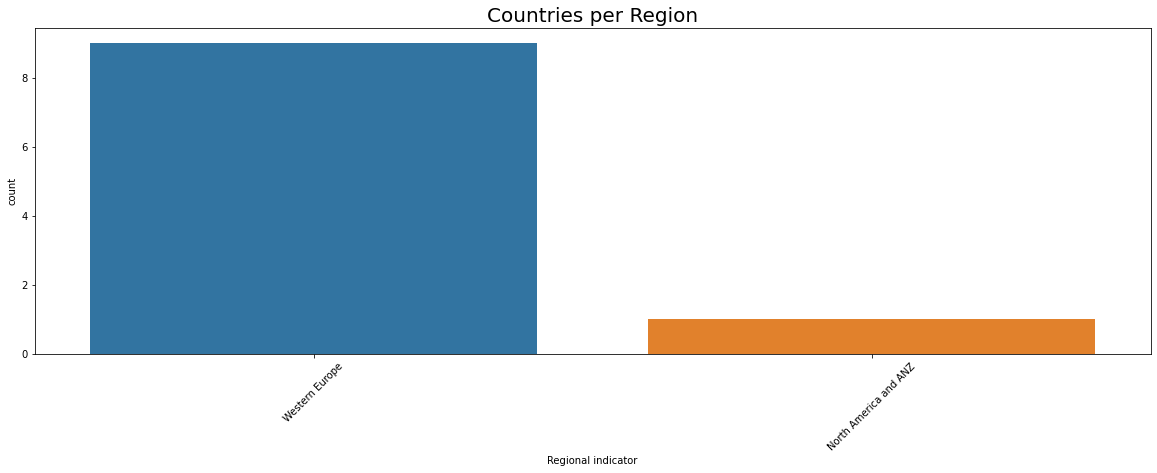

In [66]:
plt.figure(figsize=(20,6))
sns.countplot(x="Regional indicator", data=top10)
plt.xticks(rotation=45)
plt.title("Countries per Region", fontdict={'fontsize':20})
plt.show()

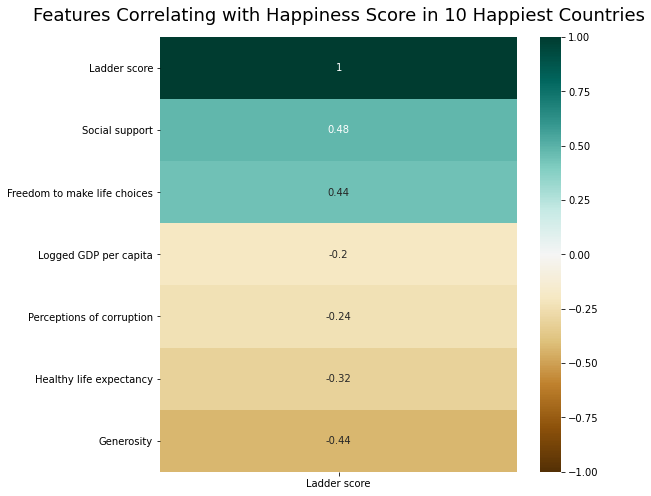

In [65]:
top10_corr = top10.reindex(columns=['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])
plt.figure(figsize=(8, 8))
happy_heatmap = sns.heatmap(top10_corr.corr()[['Ladder score']].sort_values(by='Ladder score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
happy_heatmap.set_title('Features Correlating with Happiness Score in 10 Happiest Countries', fontdict={'fontsize':18}, pad=16);

## Bottom 10 Least Happiest Countries

In [76]:
bot10.reindex(columns=important_columns).describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,3.433300,7.754600,0.643700,56.023200,0.692900,0.000700,0.70620
std,0.362624,0.829727,0.140316,3.672269,0.151356,0.191256,0.22111
min,2.523000,6.635000,0.463000,48.700000,0.382000,-0.246000,0.16700
25%,3.428000,7.502250,0.537750,53.975000,0.608000,-0.123750,0.63550
50%,3.556000,7.685500,0.627000,56.661500,0.696000,-0.035500,0.76450
75%,3.621000,7.913500,0.775500,57.986250,0.813000,0.055250,0.81600
max,3.775000,9.782000,0.832000,61.400000,0.897000,0.422000,0.92400


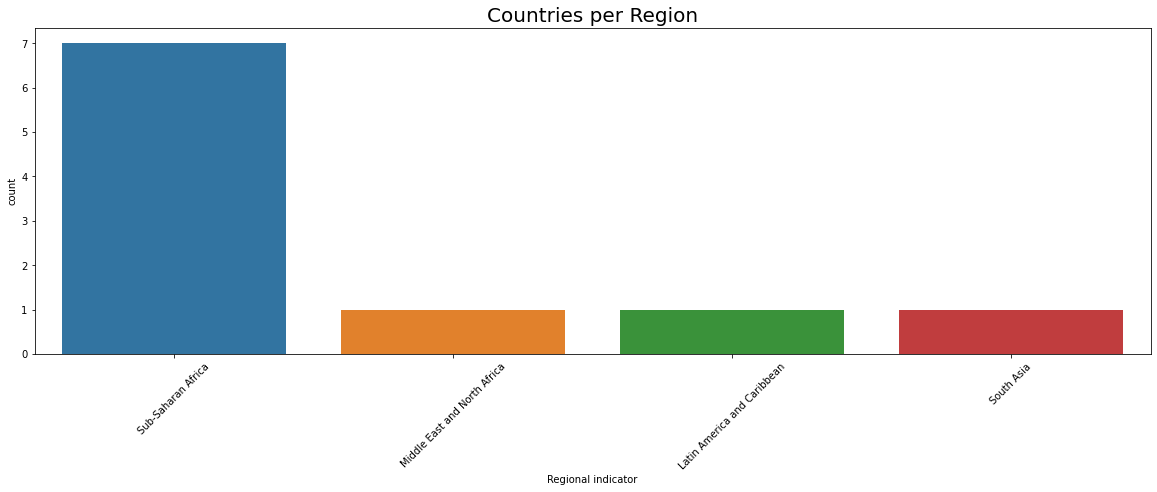

In [69]:
plt.figure(figsize=(20,6))
sns.countplot(x="Regional indicator", data=bot10)
plt.xticks(rotation=45)
plt.title("Countries per Region", fontdict={'fontsize':20})
plt.show()

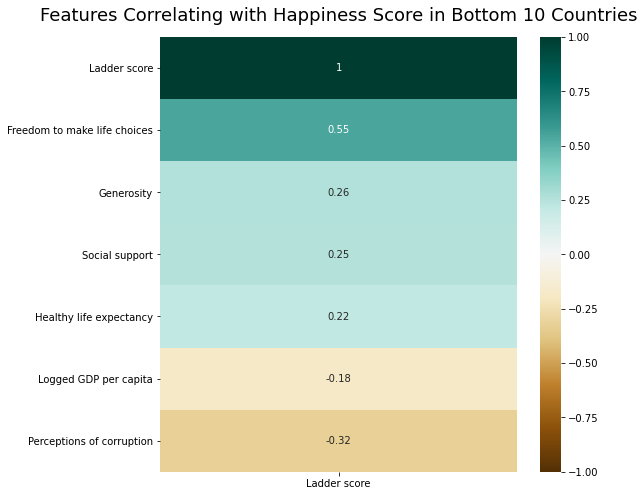

In [67]:
bot10_corr = bot10.reindex(columns=['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])
plt.figure(figsize=(8, 8))
happy_heatmap = sns.heatmap(bot10_corr.corr()[['Ladder score']].sort_values(by='Ladder score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
happy_heatmap.set_title('Features Correlating with Happiness Score in Bottom 10 Countries', fontdict={'fontsize':18}, pad=16);